### Introduction

The objective of this analysis is to examine the potential relationships between different real estate attributes and the ultimate price of a property. Our aim is to obtain insights into the data which will aid the deriviation of our RS formula.

Our attribute of focus, ultimate price is labelled as "deal_price"

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Cleaning and Preprocessing
Here we handle:
- Missing values
- Duplicates
- Outliers

In [2]:
df = pd.read_csv("riyadh_sample.csv")
df

,l_neighborhood,deal_price,area_size,meter_price,lng,lat,uuid
0,rd,1080000,350.00,3086,46.757046,24.727277,c1442e7b-ddd2-48db-b7c4-79d49412754e
1,ml,11000000,560.00,19643,46.613572,24.801113,eaab2273-b0da-407f-a0e2-170b94f19d9d
2,ml,4590000,600.00,7650,46.594482,24.794327,2be6d20a-bf6d-4a32-8459-d80deb18979a
3,ml,41760000,2610.00,16000,46.627284,24.799022,1f0a475e-4d34-42ce-af59-de8cebe00664
4,nr,2000000,500.00,4000,46.656898,24.885271,4fc312b5-bbe7-4f45-9c22-25a5ad94ae79
...,...,...,...,...,...,...,...
582,shf,1226000,875.00,1401,46.707118,24.566447,85f45195-32e5-4335-b4a6-4896dc1c343d
583,rd,1500000,735.00,2041,46.758873,24.727120,78a0cfe3-fc86-47fa-8f80-05584ce34450
584,ml,9300000,925.00,10054,46.625785,24.793738,9f24a6e8-31be-4b06-9796-9ce2d9b364ac
585,nr,1493640,324.00,4610,46.656574,24.848594,30b36baa-abc8-43d6-8940-b0bf8c4fc601


In [3]:
# Inspect data types on load
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 587 entries, 0 to 586
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   l_neighborhood  587 non-null    object 
 1   deal_price      587 non-null    int64  
 2   area_size       587 non-null    float64
 3   meter_price     587 non-null    int64  
 4   lng             587 non-null    float64
 5   lat             587 non-null    float64
 6   uuid            587 non-null    object 
dtypes: float64(3), int64(2), object(2)
memory usage: 32.2+ KB


In [4]:
# Check for missing values
df[df.isnull().any(axis=1)]

,l_neighborhood,deal_price,area_size,meter_price,lng,lat,uuid


### Handling Duplicates

In [5]:
# Check for duplicates
df[df.duplicated()]

,l_neighborhood,deal_price,area_size,meter_price,lng,lat,uuid


In [6]:
# Drop irrelevant column (in terms of correlation analysis)
df.drop(columns=["uuid"], inplace=True)

In [7]:
# After dropping the uuid column we check for duplicates again
df[df.duplicated(keep=False)].sort_values(by=df.columns.to_list())

,l_neighborhood,deal_price,area_size,meter_price,lng,lat
293,rd,178125,60.0,2969,46.765465,24.737890
507,rd,178125,60.0,2969,46.765465,24.737890
146,shf,225000,575.0,391,46.710518,24.576943
337,shf,225000,575.0,391,46.710518,24.576943
135,shf,575000,575.0,1000,46.682516,24.557641
424,shf,575000,575.0,1000,46.682516,24.557641
291,tn,1018291,875.0,1164,46.695543,24.767169
527,tn,1018291,875.0,1164,46.695543,24.767169


Duplicates exists on the same real estate, on the exact same location.<br>
These could arise as a result of accidental multiple entry or if the same property was sold, bought, and sold again.<br>
Both cases are unfavourable for our analysis and thus the duplicates will be dropped

In [8]:
duplicated_rows_count = len(df[df.duplicated()])
total_rows_count = len(df)
duplicate_perc = (duplicated_rows_count/total_rows_count) * 100

print(f"Total duplicate rows: {duplicated_rows_count}")
print(f"Percentage of rows to be lost to duplicates: {round(duplicate_perc, 2)}%")

Total duplicate rows: 4
Percentage of rows to be lost to duplicates: 0.68%


Check for duplicates again excluding the coordinates columns (lng and lat)

In [9]:
subset_columns = ["l_neighborhood", "deal_price", "area_size", "meter_price"]

df[df.duplicated(subset=subset_columns, keep=False)].sort_values(by=subset_columns)

,l_neighborhood,deal_price,area_size,meter_price,lng,lat
116,ml,2723400,400.5,6800,46.594355,24.805592
152,ml,2723400,400.5,6800,46.594220,24.805535
71,ml,3920400,594.0,6600,46.569112,24.788683
265,ml,3920400,594.0,6600,46.569313,24.788760
482,ml,4266000,540.0,7900,46.594880,24.793649
...,...,...,...,...,...,...
355,shf,2000000,900.0,2222,46.703313,24.564484
291,tn,1018291,875.0,1164,46.695543,24.767169
527,tn,1018291,875.0,1164,46.695543,24.767169
66,tn,3312500,625.0,5300,46.695794,24.777457


A lot more rows are duplicated on the primary columns ["l_neighborhood", "deal_price", "area_size", "meter_price"]<br>
But these will be preserved, because it is possible to have the same real estate attributes in different locations

In [10]:
# Duplicates accross the same location represent a small percentage and are thus safe to drop
df.drop_duplicates(inplace=True)

### Outlier Identification and Removal

In [11]:
MAIN_COLUMNS = ["deal_price", "area_size", "meter_price"]
LOCATION_COLUMNS = ["lng", "lat"]
NUMERICAL_COLUMNS =  MAIN_COLUMNS + LOCATION_COLUMNS

In [12]:
def generate_subplot_plots(data, plot_func, num_rows, num_cols, target_col=None):
    """A robust helper function to help generate multiple subplot of the passed data"""

    # Calculate the total number of subplots
    total_plots = num_rows * num_cols

    # Create a figure and axes objects for the subplots
    #fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(10, 8))
    fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(num_cols*5, num_rows*5))
    # Flatten the axes array for easier indexing
    axes = axes.flatten()

    columns_to_plot = data.columns.to_list()
    
    # Do not plot target column against itself
    if target_col:
        columns_to_plot.remove(target_col)
    
    # Loop over the data and plot each column as a subplot
    for i, col in enumerate(columns_to_plot):

        # Check if there is data available for the subplot
        if i < total_plots:
            
            if not target_col: # Ploting just one column
                # Plot the data on the corresponding subplot
                plot_func(data=data[col], ax=axes[i])
                axes[i].set_title(col)
            
            else: # Ploting a column against target
                plot_func(x=data[col],y=data[target_col], ax=axes[i])
                axes[i].set_title(f"{target_col} vs {col}")
        
        else:
            # Remove the unused subplot
            fig.delaxes(axes[i])

    # Adjust spacing between subplots and show the plots
    fig.tight_layout()
    plt.show()


Check for outliers

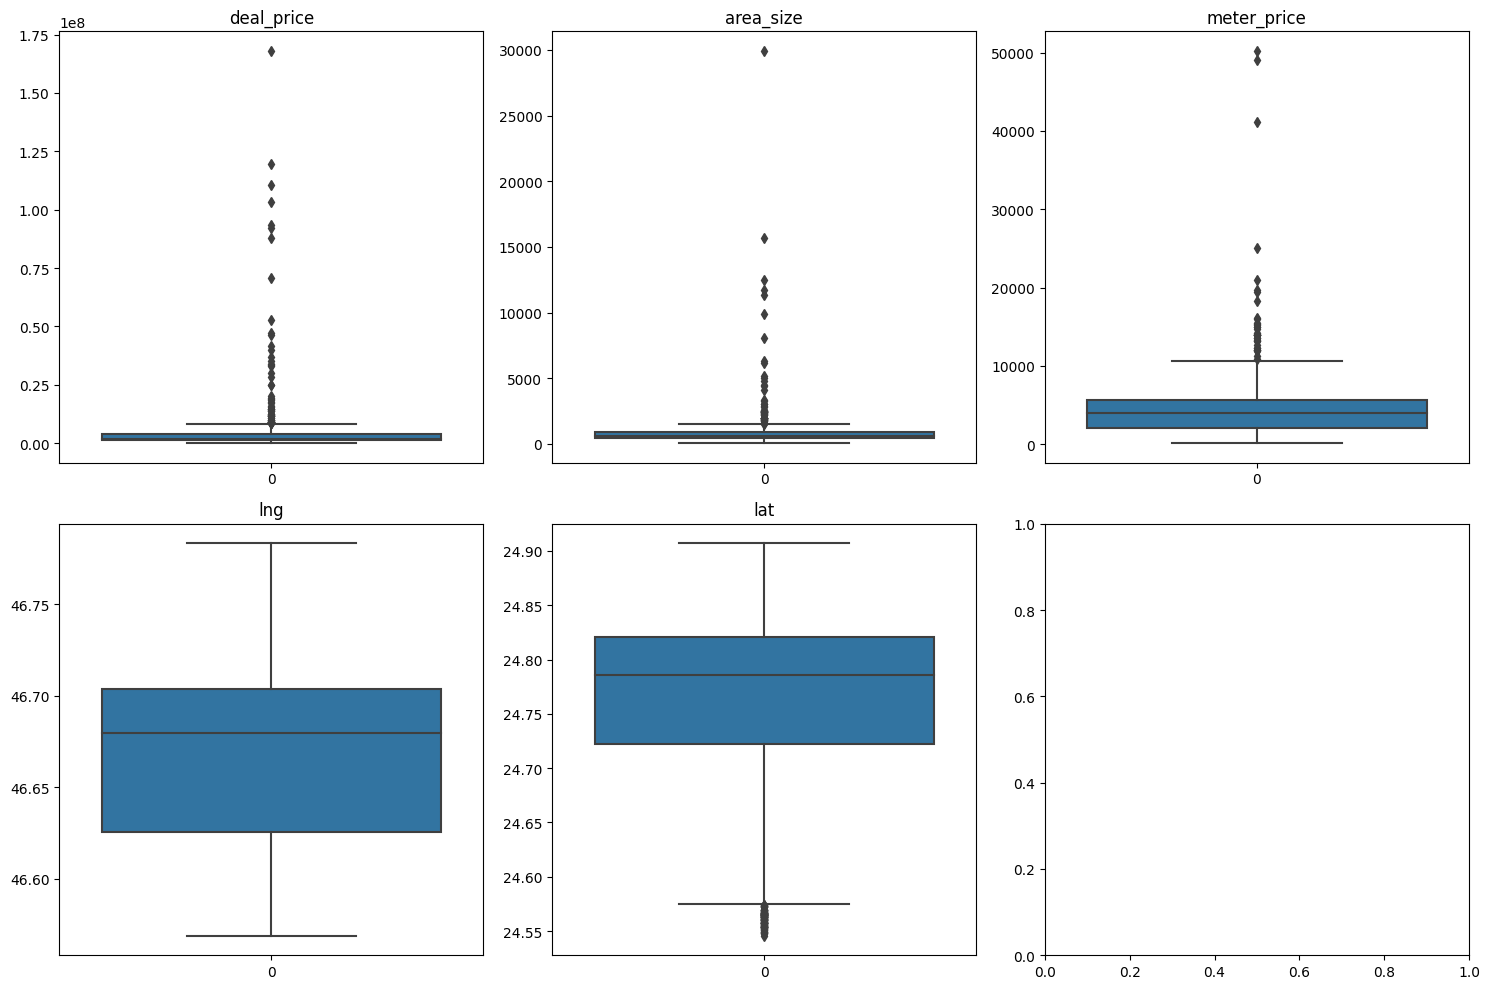

In [13]:
# Generate box plots
generate_subplot_plots(data=df[NUMERICAL_COLUMNS], plot_func=sns.boxplot, num_rows=2, num_cols=3)


deal_price, area_size, and meter_price contain significant outliers.<br>
To avoid skewing our analysis conclusions, these outliers are removed.<br>

We check the distribution of the data to determine what method should be utlized to identify an outlier.<br>
For this, no need to remove outliers in the location columns.

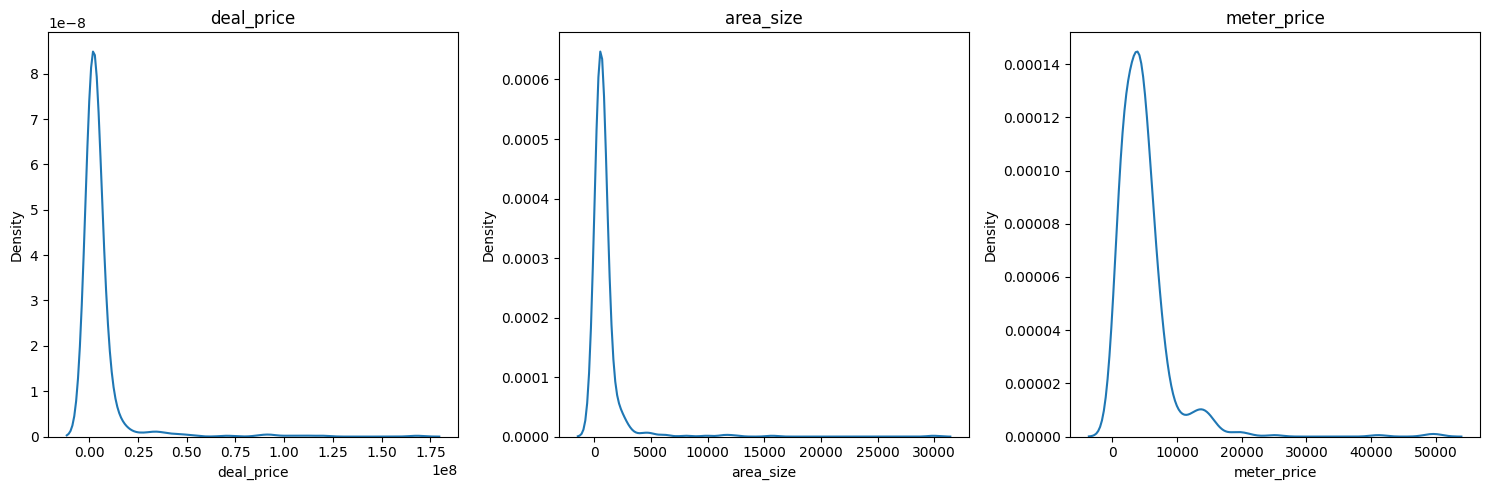

In [14]:
# Generate distribution plot
generate_subplot_plots(data=df[MAIN_COLUMNS], plot_func=sns.kdeplot, num_rows=1, num_cols=3)


Our data does not follow a normal distribution and they have extreme, one-sided outliers.<br>
So we utilize the IQR method to identify outliers

In [15]:
lenght_before = len(df)

for column in MAIN_COLUMNS:

    # Get Q1, Q2, and IQR
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    # Cacl upper and lower bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter out outliers
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    
    # Display calculation
    print(column)
    print(f"Upper bound: {upper_bound:,}")
    print(f"Lower bound: {lower_bound:,}")
    print()

# Store result
total_outliers = lenght_before - len(df)
outlier_perct = (total_outliers/lenght_before) * 100

print(f"{total_outliers} outliers removed ({round(outlier_perct, 2)}% of data)")

deal_price
Upper bound: 8,436,250.0
Lower bound: -3,133,750.0

area_size
Upper bound: 1,255.06125
Lower bound: -91.76874999999995

meter_price
Upper bound: 10,361.0
Lower bound: -3,135.0

92 outliers removed (15.78% of data)


Check plots again to confirm an effective removal

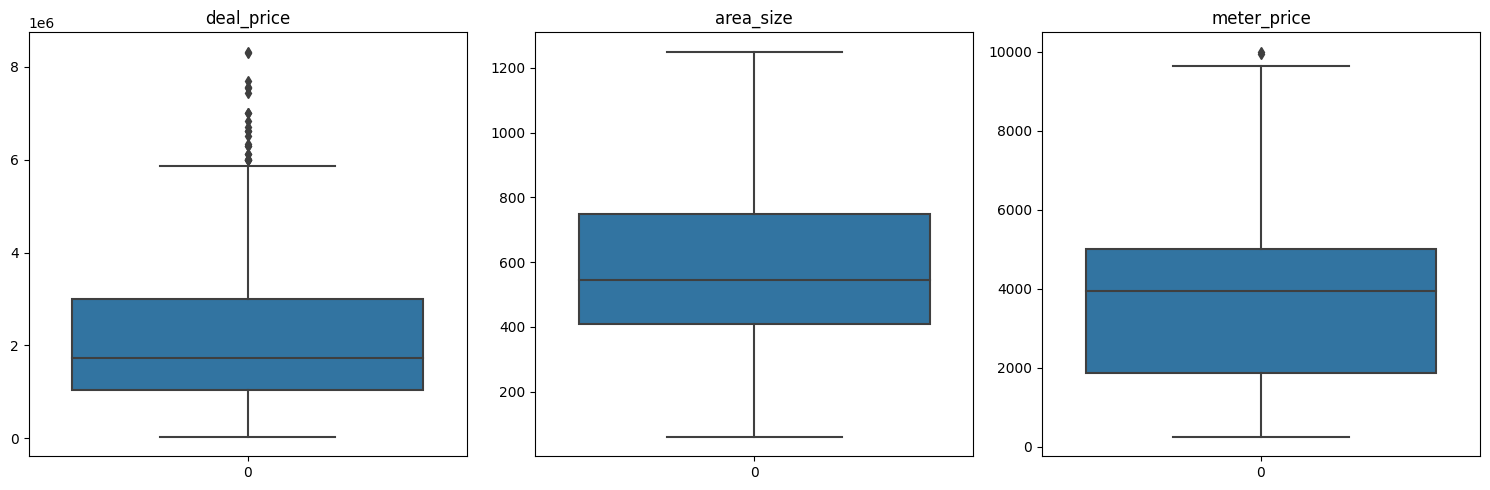

In [16]:
# Generate box plots
generate_subplot_plots(data=df[MAIN_COLUMNS], plot_func=sns.boxplot, num_rows=1, num_cols=3)


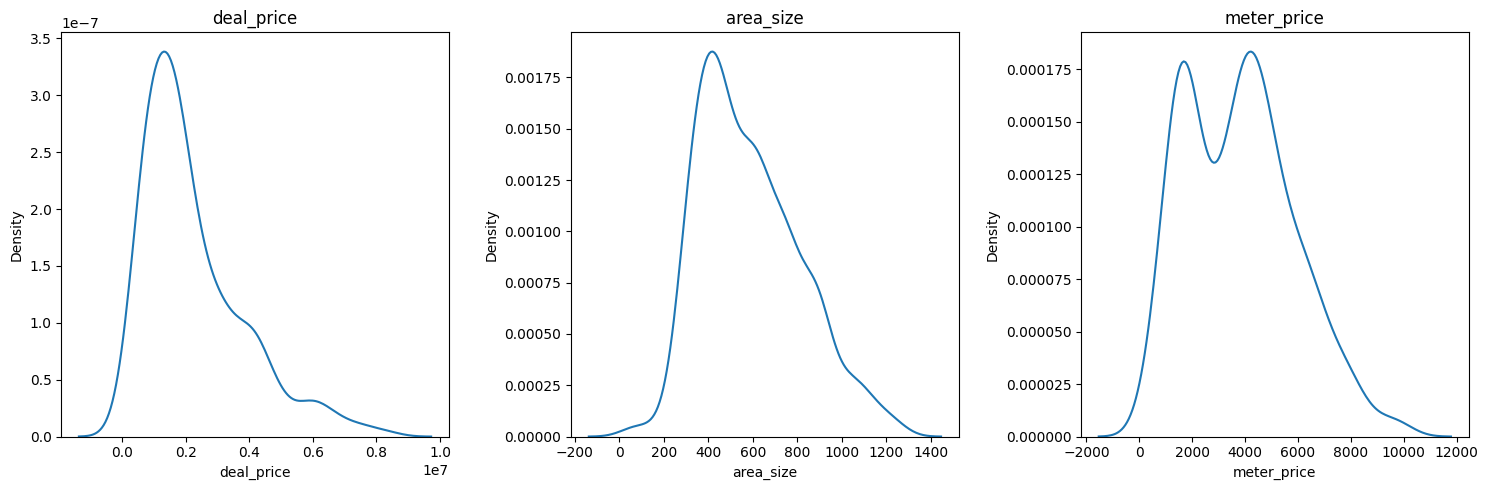

In [17]:
# Generate distribution plot
generate_subplot_plots(data=df[MAIN_COLUMNS], plot_func=sns.kdeplot, num_rows=1, num_cols=3)


Q. why does the meter price fall around the center?

## Analysis

The goal of this analysis is to to uncover potential correlations among the features.

The analysis will be performed in two groups:
- Analyzing the data as a whole
- Analyzing the data based on the individual neighborhoods

In [18]:
MAIN_COLUMNS = ["deal_price", "area_size", "meter_price"]
LOCATION_COLUMNS = ["lng", "lat"]
NUMERICAL_COLUMNS =  MAIN_COLUMNS + LOCATION_COLUMNS

Correlation between deal_price and location columns (lat and long) will be ignored because coordinates are not ordinal and any linear relationship seen is purely by chance.

In [19]:
df['l_neighborhood'].value_counts()

nr     130
shf    130
rd     107
ml      96
tn      28
Name: l_neighborhood, dtype: int64

In [20]:
df[MAIN_COLUMNS].describe()

,deal_price,area_size,meter_price
count,4.910000e+02,491.000000,491.000000
mean,2.239743e+06,587.186273,3805.317719
std,1.607527e+06,226.732564,2054.175622
min,3.000000e+04,60.000000,250.000000
25%,1.050000e+06,408.100000,1859.500000
50%,1.740006e+06,546.000000,3949.000000
75%,3.001500e+06,750.000000,5013.500000
max,8.325000e+06,1250.000000,10000.000000


#### Whole Data

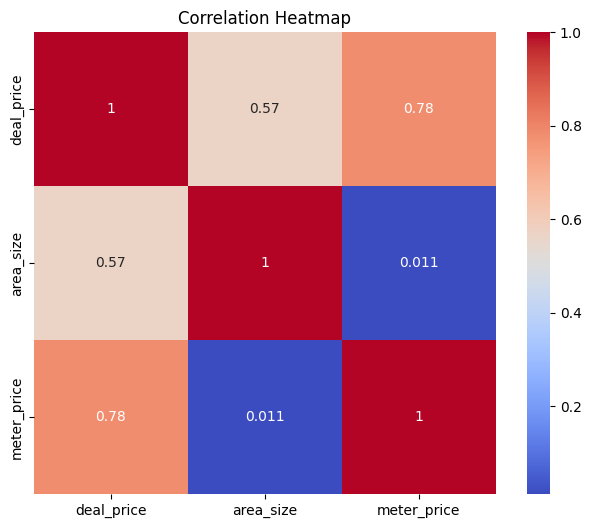

In [21]:
corr_matrix = df[MAIN_COLUMNS].corr()

# Build correlation matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", square=True)
plt.title("Correlation Heatmap")
plt.show()

Q. Why is there almost zero correlation between meter_price and area_size?

meter_price    0.782613
area_size      0.565103
Name: deal_price, dtype: float64


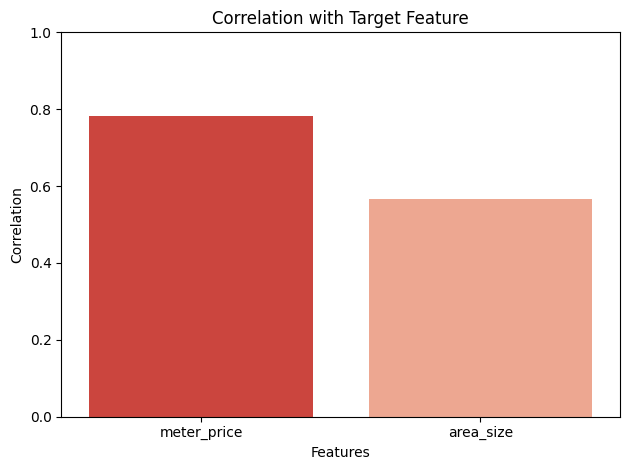

In [22]:
deal_price_corr = corr_matrix["deal_price"].drop("deal_price") # Extract correlations with ultimate_price
deal_price_corr = deal_price_corr.sort_values(ascending=False) # Sort data

print(deal_price_corr)

# Plot a bar chart
sns.barplot(x=deal_price_corr.index, y=deal_price_corr.values, palette="Reds_r")

plt.ylim(None, 1)
plt.xlabel('Features')
plt.ylabel('Correlation')
plt.title('Correlation with Target Feature')
plt.tight_layout()
plt.show()

meter_price has a good correlation with deal_price<br>
area_size is rather low, but significant

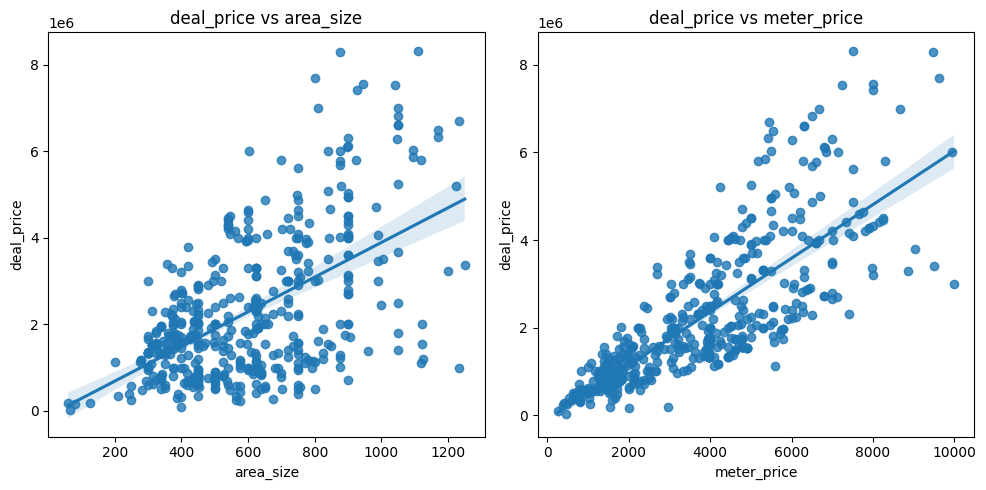

In [23]:
generate_subplot_plots(data=df[MAIN_COLUMNS], plot_func=sns.regplot, num_rows=1, num_cols=2, target_col="deal_price")

The correlation with area_size looks to be more pronouced at medium deal prices, and for meter_price it looka more pronouced at low deal prices.<br>

Lets inspect this finding futher.

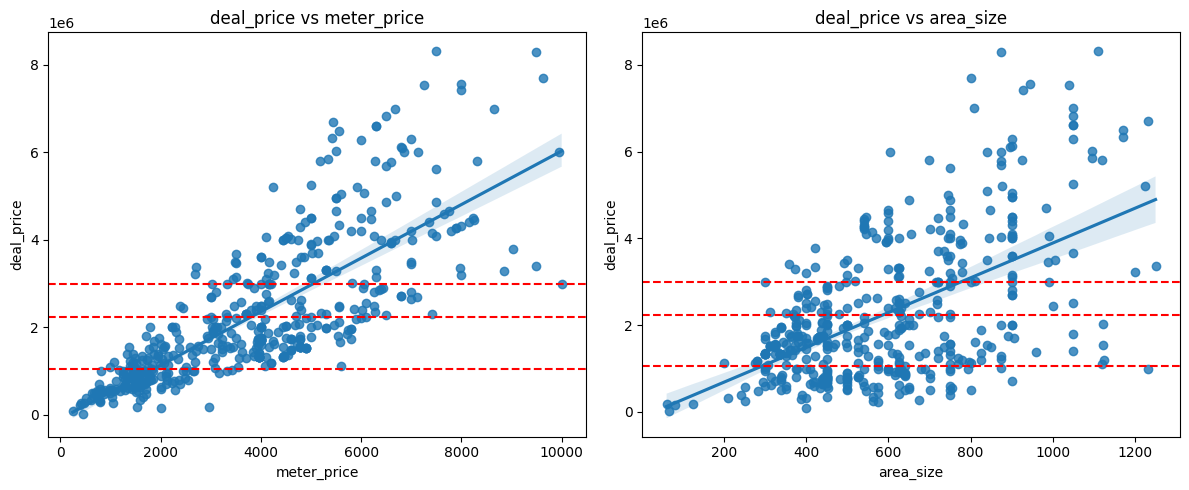

In [24]:
avg_deal_price = df["deal_price"].mean()
Q1 = df["deal_price"].quantile(0.25)
Q3 = df["deal_price"].quantile(0.75)

IQR = Q3 - Q1

# Cacl upper and lower bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


# Get subplots axes
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
axes = axes.flatten()

# Create the scatter plot with regression line
sns.regplot(x=df["meter_price"], y=df["deal_price"], ax=axes[0])
# Add the average line
axes[0].axhline(y=avg_deal_price, color='red', linestyle='--', label='Average')
axes[0].axhline(y=Q1, color='red', linestyle='--', label='Q1')
axes[0].axhline(y=Q3, color='red', linestyle='--', label='Q3')
axes[0].set_title("deal_price vs meter_price")

# Create the scatter plot with regression line
sns.regplot(x=df["area_size"], y=df["deal_price"], ax=axes[1])
# Add the average line
axes[1].axhline(y=avg_deal_price, color='red', linestyle='--', label='Average')
axes[1].axhline(y=Q1, color='red', linestyle='--', label='Q1')
axes[1].axhline(y=Q3, color='red', linestyle='--', label='Q3')
axes[1].set_title("deal_price vs area_size")

fig.tight_layout()
plt.show()

deal_price     1.000000
area_size      0.175768
meter_price    0.759344
Name: deal_price, dtype: float64


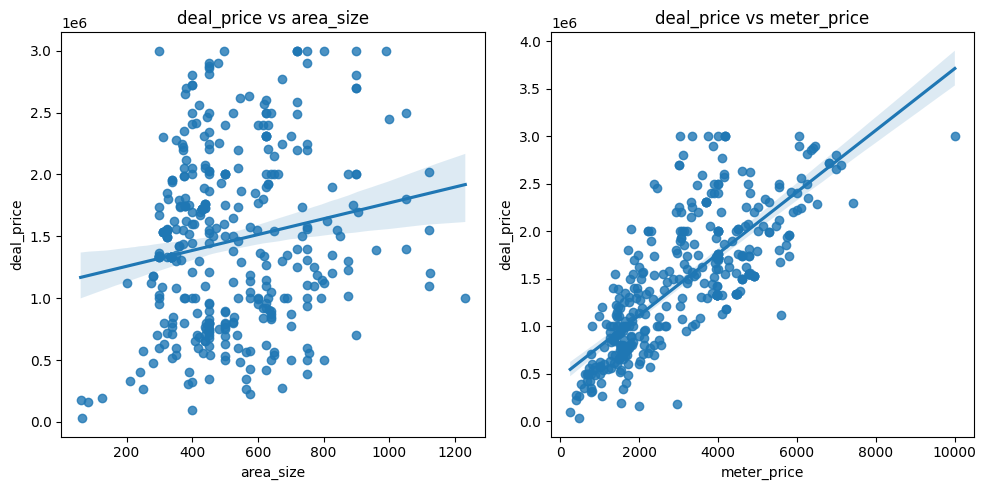

In [25]:
trimmed_data = df[df["deal_price"] <= Q3]

print(trimmed_data[MAIN_COLUMNS].corr()["deal_price"])

generate_subplot_plots(data=trimmed_data[MAIN_COLUMNS], plot_func=sns.regplot, num_rows=1, num_cols=2, target_col="deal_price")

Contrary to other assumption, correlation does not necessarily improve at lower deal prices

#### Neighborhoods

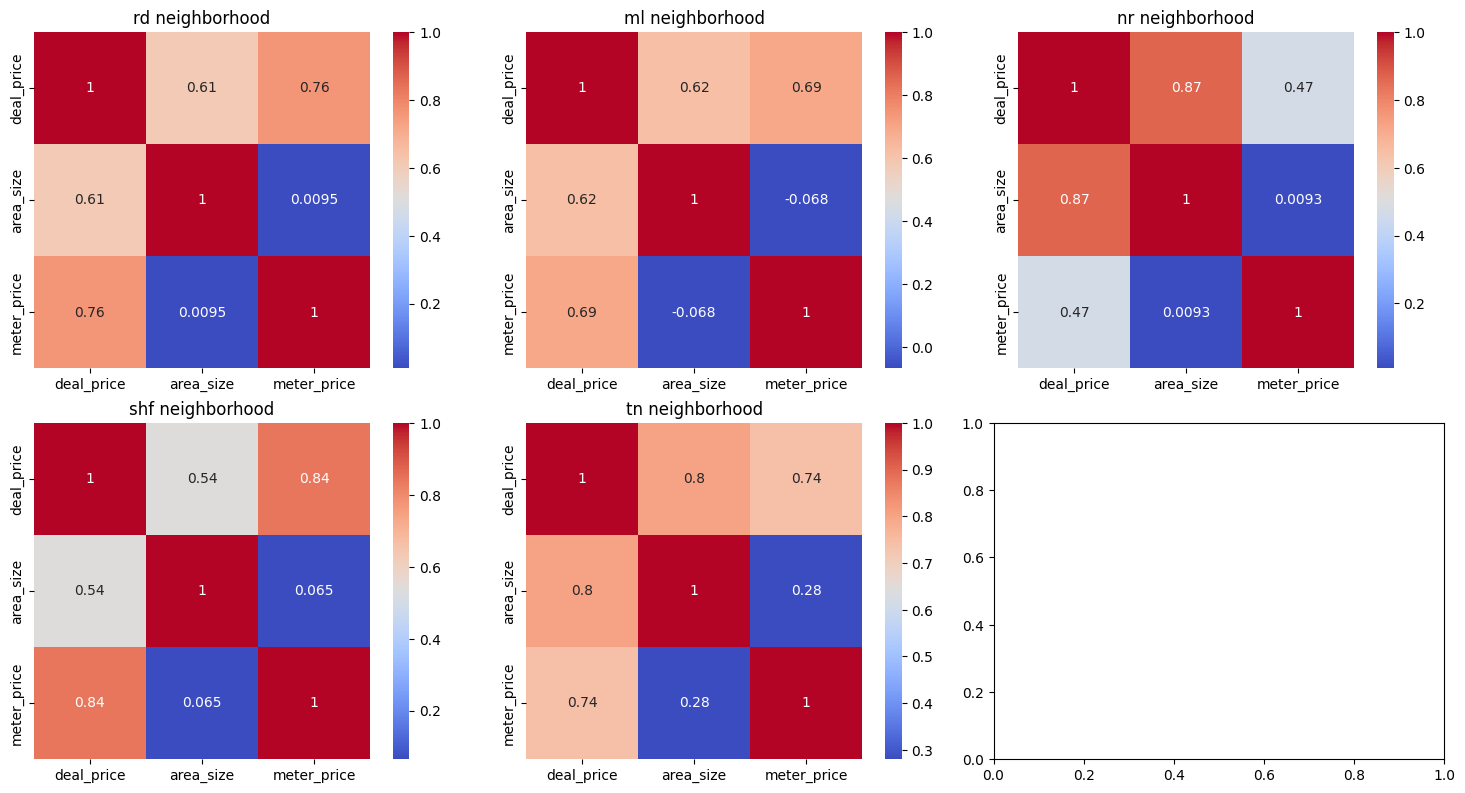

In [26]:
# Get subplots axes
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))
axes = axes.flatten()

# Dictionary to hold correlation matrices
neighborhood_deal_price_corrs = {}

for i, neighborhood in enumerate(df["l_neighborhood"].unique()):
    neighborhood_df = df[df['l_neighborhood']==neighborhood]

    # Get individual neighborhood plots
    corr_matrix_2 = neighborhood_df[MAIN_COLUMNS].corr()
    
    # Store the filtered matrix into a dict
    deal_price_corr_2 = corr_matrix_2["deal_price"].drop("deal_price") # Extract correlations with ultimate_price
    deal_price_corr_2 = deal_price_corr_2.sort_values(ascending=False) # Sort data
    neighborhood_deal_price_corrs[neighborhood] = deal_price_corr_2

    # Build correlation matrix heatmap
    sns.heatmap(corr_matrix_2, annot=True, cmap="coolwarm", square=True, ax=axes[i])
    axes[i].set_title(f"{neighborhood} neighborhood")
    

fig.tight_layout()
plt.show()

In [27]:
neighborhood_corr_df = pd.DataFrame(neighborhood_deal_price_corrs)
# Calc average
neighborhood_corr_df['average_of_neighborhoods'] = neighborhood_corr_df.mean(axis=1)

neighborhood_corr_df['as_total'] = deal_price_corr

neighborhood_corr_df

,rd,ml,nr,shf,tn,average_of_neighborhoods,as_total
area_size,0.608938,0.617481,0.867670,0.538974,0.801762,0.686965,0.565103
meter_price,0.763654,0.692452,0.469674,0.842468,0.740020,0.701654,0.782613


Looking at the individual neighborhoods and the average, we see that the correlation between area_size and deal_price increases significantly when the neighborhoods are considered individually than when they are considered as a whole.

Q. Is there any advantage in estimating deal_price based on neighborhood-level area_size and whole-level meter_price ? 

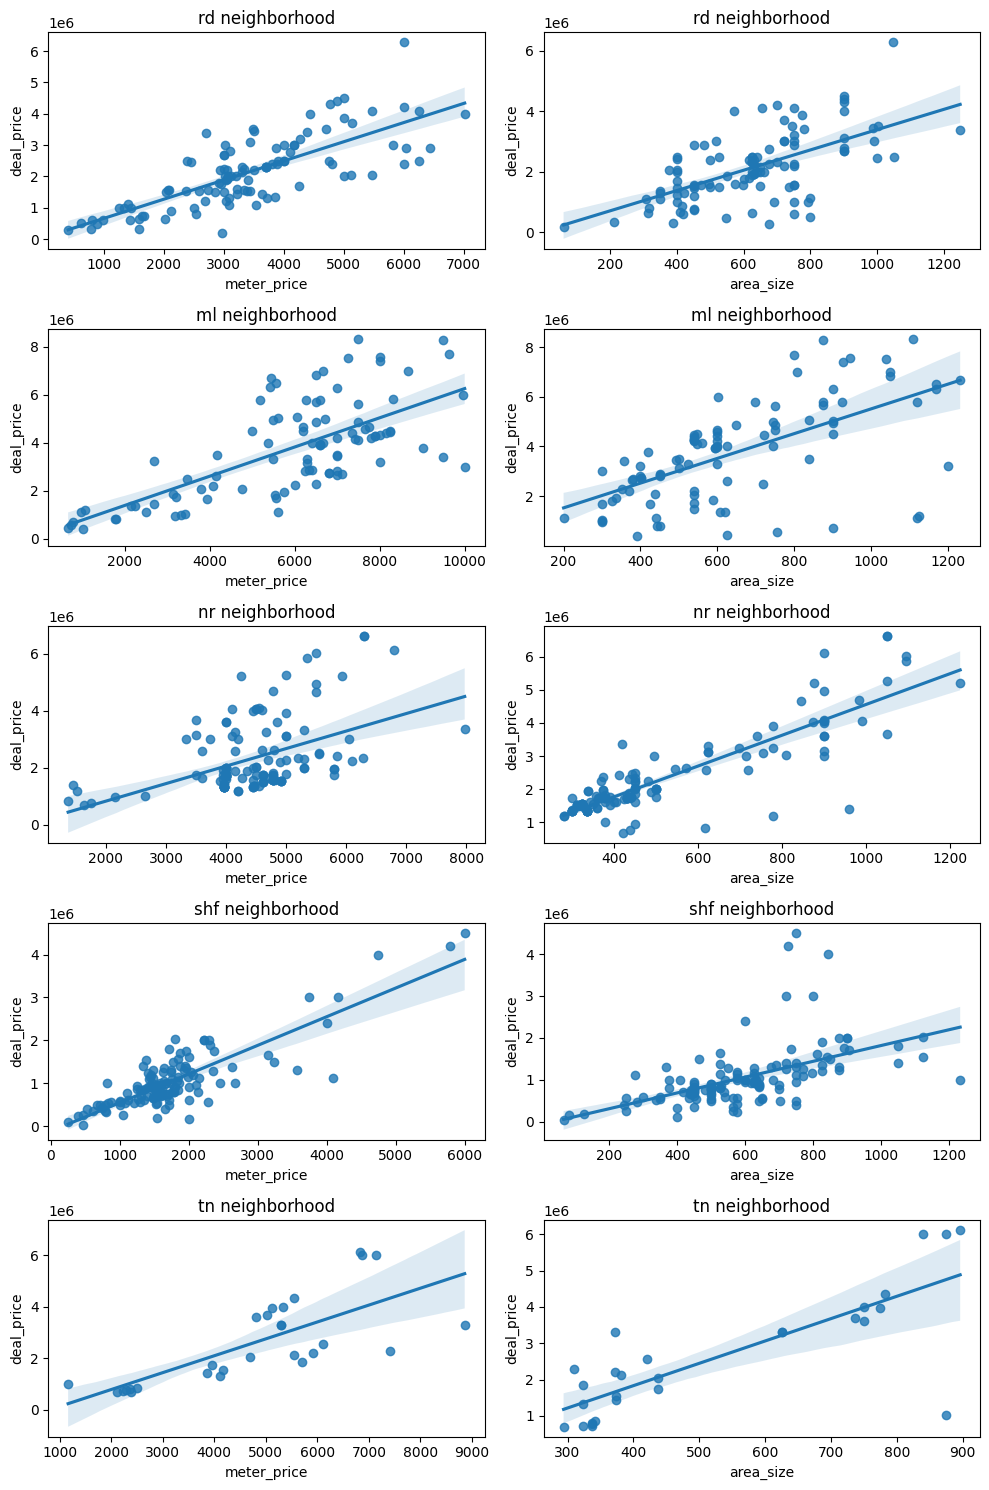

In [28]:
# Get subplots axes
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(10, 15))
axes = axes.flatten()


for i, neighborhood in enumerate(df["l_neighborhood"].unique()):

    plot_1 = i * 2
    plot_2 = plot_1 + 1

    # Get individual neighborhood data
    neighborhood_df = df[df['l_neighborhood']==neighborhood]

    # Build regression plot (meter_price)
    sns.regplot(x=neighborhood_df["meter_price"], y=neighborhood_df["deal_price"], ax=axes[plot_1])
    axes[plot_1].set_title(f"{neighborhood} neighborhood")

    # Build regression plot (area_size)
    sns.regplot(x=neighborhood_df["area_size"], y=neighborhood_df["deal_price"], ax=axes[plot_2])
    axes[plot_2].set_title(f"{neighborhood} neighborhood")
    

fig.tight_layout()
plt.show()

shf neighborhood which has the best correlation between meter_price and deal_price also has more low deal_price vlaues